In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re

In [2]:
raw_reviews = pd.read_csv("pitchforkreviews.csv",
                sep = "|", 
                header = None,
                index_col = False,
               names = ['ReviewID', 'ReviewURL', 'ArtistID', 'Artist', 'Album', 'AlbumArtLink', 'Score', 'BNM', 'BNR', 'GenreList', 'LabelList', 'YearList', 'isReissue', 'Writer', 'WriterLink', 'PublishDate', 'RawReview'])

In [3]:
reviews = (
    raw_reviews.
        assign(GenreList = lambda x: x.GenreList.apply(ast.literal_eval)).
        assign(LabelList = lambda x: x.LabelList.apply(ast.literal_eval).apply(set).apply(list)).
        assign(GenreCount = lambda x: x.GenreList.apply(len)).
        assign(LabelCount = lambda x: x.LabelList.apply(len)).
        assign(Review = lambda x: x.RawReview.apply(lambda z: re.sub("<(.*?)>", "", z))).
        assign(PublishDate = lambda x: x.PublishDate.apply(pd.to_datetime)).
        assign(PublishYear = lambda x: x.PublishDate.apply(lambda y: y.year))
)

reviews

,ReviewID,ReviewURL,ArtistID,Artist,Album,AlbumArtLink,Score,BNM,BNR,GenreList,...,YearList,isReissue,Writer,WriterLink,PublishDate,RawReview,GenreCount,LabelCount,Review,PublishYear
0,NaN,https://pitchfork.com/reviews/albums/catherine...,0,Catherine Christer Hennix,Selected Early Keyboard Works,https://media.pitchfork.com/photos/5b9142c8d24...,7.2,0,0,[Experimental],...,2018,0,Andy Beta,/staff/andy-beta/,2018-09-08,"<div class=""contents dropcap""><p>Ten years ago...",1,1,"Ten years ago, followers of drone, experimenta...",2018
1,NaN,https://pitchfork.com/reviews/albums/thou-magus/,30076,Thou,Magus,https://media.pitchfork.com/photos/5b8700aba9c...,7.8,0,0,[Metal],...,2018,0,Dale W Eisinger,/staff/dale-w-eisinger/,2018-09-08,"<div class=""contents dropcap""><p>In more than ...",1,1,"In more than a decade as a band, Baton Rouge s...",2018
2,NaN,https://pitchfork.com/reviews/albums/ipek-gorg...,0,Ipek Gorgun,Ecce Homo,https://media.pitchfork.com/photos/5b90072ddb7...,7.5,0,0,[Electronic],...,2018,0,Marc Masters,/staff/marc-masters/,2018-09-08,"<div class=""contents dropcap""><p>In the work o...",1,1,"In the work of Ipek Gorgun, small moves and gr...",2018
3,NaN,https://pitchfork.com/reviews/albums/led-zeppe...,2439,Led Zeppelin,The Song Remains the Same,https://media.pitchfork.com/photos/5b913f8ae4e...,7.3,0,0,[Rock],...,2018,0,Jeremy Gordon,/staff/jeremy-gordon/,2018-09-08,"<div class=""contents dropcap""><p>The witching ...",1,2,The witching hour approaches. A full moon peek...,2018
4,NaN,https://pitchfork.com/reviews/albums/yves-tumo...,34005,Yves Tumor,Safe in the Hands of Love,https://media.pitchfork.com/photos/5b919e87f5a...,9.1,1,0,[Experimental],...,2018,0,Jayson Greene,/staff/jayson-greene/,2018-09-07,"<div class=""contents dropcap""><p>You can ask t...",1,1,You can ask to be known and you can resist bei...,2018
5,NaN,https://pitchfork.com/reviews/albums/waxahatch...,31022,Waxahatchee,Great Thunder EP,https://media.pitchfork.com/photos/5b87018d78e...,7.3,0,0,[Rock],...,2018,0,Olivia Horn,/staff/olivia-horn/,2018-09-07,"<div class=""contents dropcap""><p>Katie Crutchf...",1,1,Katie Crutchfield’s back catalog is ripe for r...,2018
6,NaN,https://pitchfork.com/reviews/albums/comethazi...,0,Comethazine,Bawskee,https://media.pitchfork.com/photos/5b87023ee67...,2.6,0,0,[Rap],...,2018,0,Alphonse Pierre,/staff/alphonse-pierre/,2018-09-07,"<div class=""contents dropcap""><p>Put a team of...",1,1,Put a team of desperate record executives look...,2018
7,NaN,https://pitchfork.com/reviews/albums/agent-sas...,0,Agent Sasco,Hope River,https://media.pitchfork.com/photos/5b8ffc3521b...,6.5,0,0,[Pop/R&B],...,2018,0,Edwin “STATS” Houghton,/staff/edwin-stats-houghton/,2018-09-07,"<div class=""contents dropcap""><p>To many liste...",1,1,"To many listeners, veteran dancehall MC (or, d...",2018
8,NaN,https://pitchfork.com/reviews/albums/eminem-ka...,1339,Eminem,Kamikaze,https://media.pitchfork.com/photos/5b8ffa5ddb7...,5.0,0,0,[Rap],...,2018,0,Marc Hogan,/staff/marc-hogan/,2018-09-06,"<div class=""contents dropcap""><p>Released with...",1,3,"Released without prior announcement, only a tw...",2018
9,NaN,https://pitchfork.com/reviews/albums/four-tet-...,1547,Four Tet,"Live at Funkhaus Berlin, 10th May 2018",https://media.pitchfork.com/photos/5b8fe467f5b...,7.2,0,0,[Electronic],...,2018,0,Andy Beta,/staff/andy-beta/,2018-09-06,"<div class=""contents dropcap""><p>Is there a pr...",1,1,Is there a producer more generous than Four Te...,2018


# How has Pitchfork scaled year over year?

Pitchfork started in 1996, even though the Conde Nast database appears to only date back to 2000.  Was Pitchfork increasing in size (or at least review volume) as it continued to gain cultural cachet into the late 2010s?

In [4]:
year_counts = reviews[['PublishYear']].groupby('PublishYear').size().reset_index(name='count')
year_counts

,PublishYear,count
0,1999,222
1,2000,351
2,2001,469
3,2002,930
4,2003,1085
5,2004,1172
6,2005,1257
7,2006,1251
8,2007,1248
9,2008,1251


Text(0.5,1,'Count of Pitchfork Album Reviews By Year')

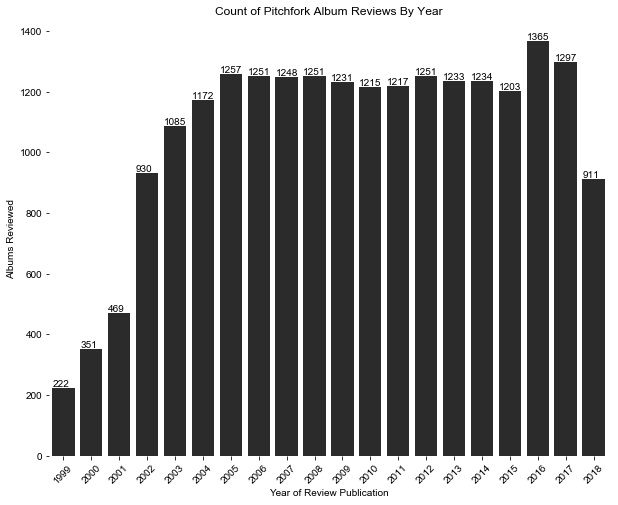

In [6]:
plt.figure(figsize = (10, 8))

viz = sns.barplot(data = year_counts, x = 'PublishYear', y = 'count', color = '#2b2b2b')

for t, label in zip(viz.patches, year_counts['count']):
    viz.annotate(label, (t.get_x(), t.get_height()+5))

sns.set_style({'font.sans-serif':['Walfork','Walsheim','Helvetica Neue','Helvetica','Arial']})
sns.despine(ax = viz, bottom = True, left = True)
viz.set(xlabel = "Year of Review Publication", ylabel = "Albums Reviewed")
plt.xticks(rotation = 45)
plt.title("Count of Pitchfork Album Reviews By Year")

#sns.plot.show()

# How has the distribution of genres being covered changed over time?

In [11]:
genres = reviews['GenreList'].apply(pd.Series)
expanded_genres = pd.concat([reviews[['Score', 'PublishYear']], genres], axis = 1)
expanded_genres

,Score,PublishYear,0,1,2,3
0,7.2,2018,Experimental,NaN,NaN,NaN
1,7.8,2018,Metal,NaN,NaN,NaN
2,7.5,2018,Electronic,NaN,NaN,NaN
3,7.3,2018,Rock,NaN,NaN,NaN
4,9.1,2018,Experimental,NaN,NaN,NaN
5,7.3,2018,Rock,NaN,NaN,NaN
6,2.6,2018,Rap,NaN,NaN,NaN
7,6.5,2018,Pop/R&B,NaN,NaN,NaN
8,5.0,2018,Rap,NaN,NaN,NaN
9,7.2,2018,Electronic,NaN,NaN,NaN


In [13]:
melted_genres = pd.melt(expanded_genres, id_vars = ['Score', 'PublishYear'], value_vars=[0, 1, 2, 3]).drop(columns='variable')
genre_scores = melted_genres[melted_genres['value'].notnull()]
genre_scores = genre_scores.rename(index = str, columns = {'value': 'Genre'})
#genre_scores['Year'] = genre_scores['PublishDate'].apply(lambda x: x.year)
genre_scores

,Score,PublishYear,Genre
0,7.2,2018,Experimental
1,7.8,2018,Metal
2,7.5,2018,Electronic
3,7.3,2018,Rock
4,9.1,2018,Experimental
5,7.3,2018,Rock
6,2.6,2018,Rap
7,6.5,2018,Pop/R&B
8,5.0,2018,Rap
9,7.2,2018,Electronic


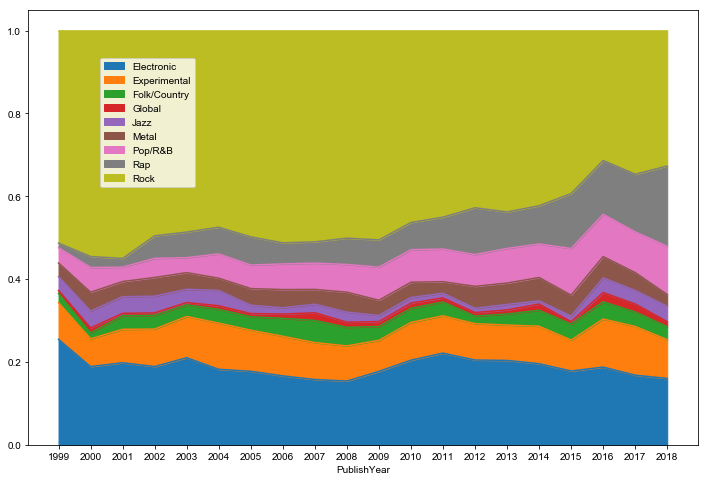

In [110]:
yearly_genre_counts = (genre_scores.
                       groupby(['PublishYear', 'Genre']).
                       count().
                       reset_index().
                       rename(index=str, columns = {"Score": "reviews"}))

yearly_counts = (genre_scores.
                 groupby(['PublishYear']).
                 count().
                 reset_index().
                 drop('Score', axis = 1).
                 rename(index=str, columns = {"Genre": "year_count"}))

genres = (pd.merge(yearly_genre_counts, yearly_counts, how = 'left').
             assign(review_pct = lambda x: x.reviews / x.year_count ).
             drop('reviews', axis = 1).
             drop('year_count', axis = 1))

genre_pivot = genres.pivot(index = 'PublishYear', columns = 'Genre', values = 'review_pct')

xticks = [date for date in genres.PublishYear.unique()]

genre_pivot.plot.area(figsize = (12, 8), xticks = xticks).legend(loc = 'upper left', bbox_to_anchor = (0.1, .9))

From here we can see that Rock has been less and less prevalent over time, with Rap showing the largest gains over time. Let's filter out a few genres to cast this into sharper relief.

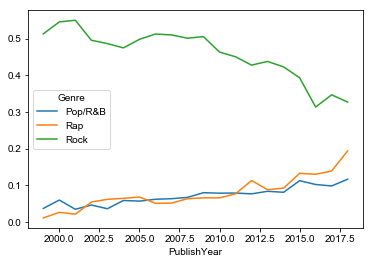

In [142]:
#  genres.PublishYear % 5 == 0 & 

shifting_genres = genres[(genres.Genre.isin(['Rap', 'Rock', 'Pop/R&B']))].\
                  pivot(index = 'PublishYear', columns = 'Genre', values = 'review_pct')

shifting_genres.plot()

# How is Score Affected by Genre?

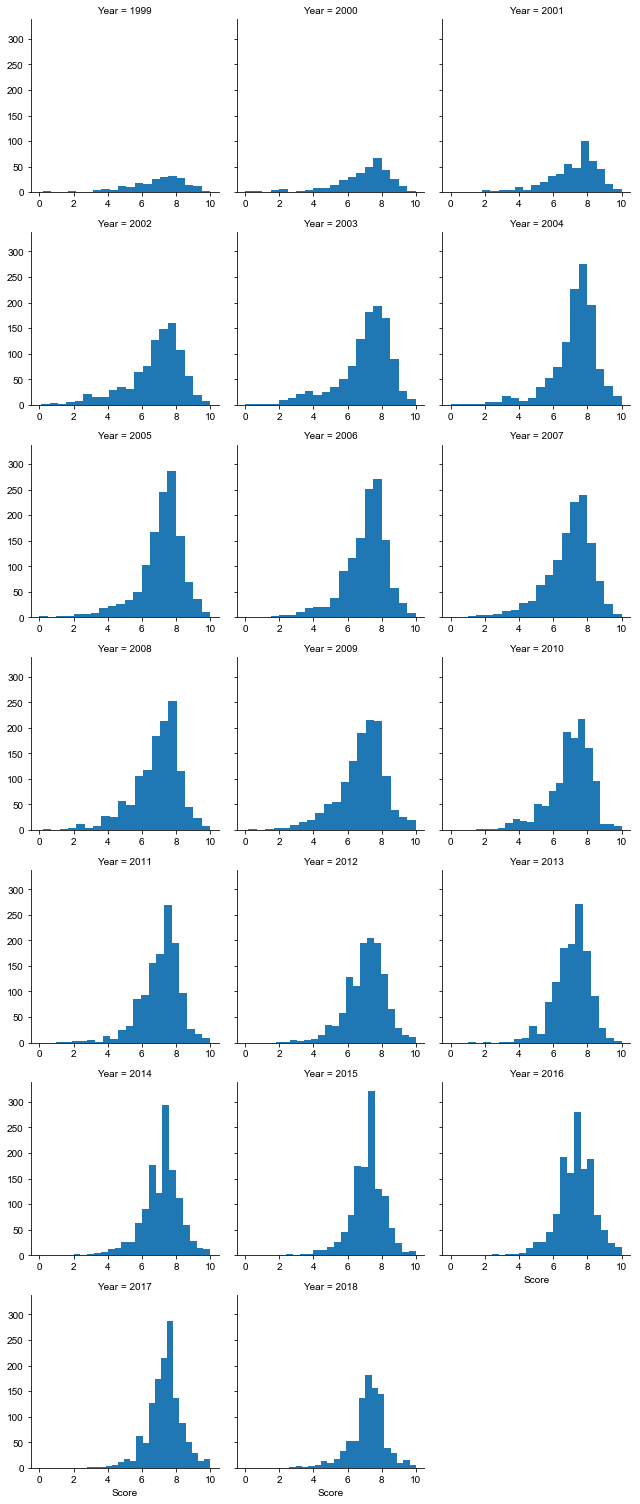

In [9]:
g = sns.FacetGrid(genre_scores, col = 'Year', col_wrap = 3)
for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)
    
g.map(plt.hist, "Score", bins = 20)

Were reviews panned more often in Pitchfork's early years?

In [ ]:
pans = genre_scores[genre_scores.Score < 5]
p = sns.FacetGrid(pans, col = 'Year', col_wrap = 3)
for ax in p.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)
    
p.map(plt.hist, "Score", bins = 5)